# Steps

1. Find unique values, missing data, shape of df
2. Visualize ratings
3. Frequency plot of ratings
4. How often was a product rated a particular rating
5. Convert timestamp to something useable
6. 

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

In [2]:
#Importing Data

df = pd.read_csv('Datasets/Amazon Reviews.csv', names = ['User ID','Product ID','Rating','Time Stamp'])
df['Time Stamp'] = df['Time Stamp'].apply(lambda x:datetime.fromtimestamp(x))
df = df.rename(columns={'Time Stamp':'Date'})
df.head()

,User ID,Product ID,Rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13 04:00:00
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01 04:00:00
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29 04:00:00
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22 04:00:00
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18 04:00:00


In [3]:
df['Date'].dt.hour.value_counts()

4    7824482
Name: Date, dtype: int64

### Since the time part of the time stamp is all at the same exact time we can omit it from the column

In [4]:
df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.head()

,User ID,Product ID,Rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18


# Data Exploration

In [5]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :\n',df.nunique())
print('\nMissing values in columns:\n',df.isnull().sum())
print('\nDuplicated rows: \n',df.duplicated().value_counts())
print('\nData Types of each column: \n', df.dtypes)

Rows     : 7824482
Columns  : 4

Features :
     : ['User ID', 'Product ID', 'Rating', 'Date']

Missing values    : 0

Unique values :
 User ID       4201696
Product ID     476002
Rating              5
Date             5489
dtype: int64

Missing values in columns:
 User ID       0
Product ID    0
Rating        0
Date          0
dtype: int64

Duplicated rows: 
 False    7824482
dtype: int64

Data Types of each column: 
 User ID               object
Product ID            object
Rating               float64
Date          datetime64[ns]
dtype: object


1. Total number of each rating
2. Total number of ratings per user
3. Percentage of ratings (quantiles)

# Data Visualization

## 1. Total Number of Each Rating

### Below we can see how many times each rating was given. A very arge number of products received a 5 star review and next was the 4 star. So it seems that users who have rated products were generally happy with the products they received and very few in comparison left users unsatisfied.

Text(0.5, 1.0, 'Count of Ratings')

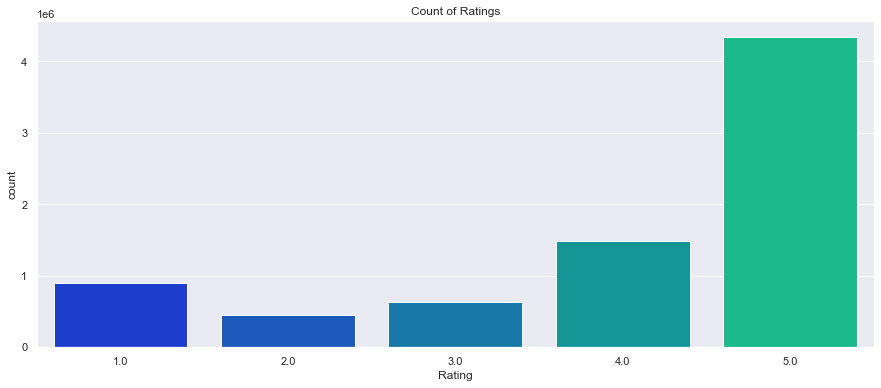

In [6]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'Rating', palette = 'winter')
plt.title('Count of Ratings')

## 2. Total Number of Ratings per User
### Here we observe the number of ratings given by each user. It seems that up until the 75th percentile of users only gave a single rating to products and the maximum rating given by a single user was 103.

In [7]:
df.groupby('User ID').count().describe()

,Product ID,Rating,Date
count,4.201696e+06,4.201696e+06,4.201696e+06
mean,1.862220e+00,1.862220e+00,1.862220e+00
std,2.885110e+00,2.885110e+00,2.885110e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00
max,5.200000e+02,5.200000e+02,5.200000e+02


## 3. Percentage of Number of Ratings Given
### We have seen that most products received either a 5 star or 4 star review. But out of all products reveiwed, what do the percentages of these look like? How many received a 5 star review out of the total number of products reveiwed.

Text(0, 0.5, 'Percentage')

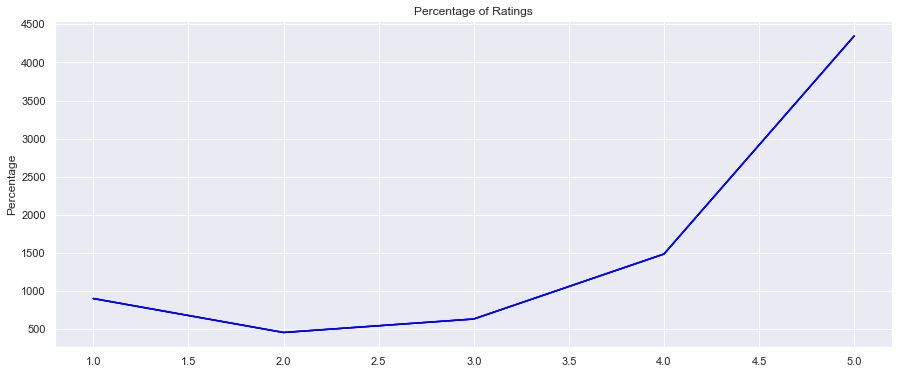

In [8]:
plt.figure(figsize=(15,6))
plt.plot((df.groupby('Rating').count()/100000)*100, color='blue')
plt.title('Percentage of Ratings')
plt.ylabel('Percentage')

### It seems that more than 50% of products received a 5 star review and another 20% received a 4 star review. We can now accurately conclude that atleast 70% of the products reviewed were of high quality, or at least left the user satisfied.

<AxesSubplot:>

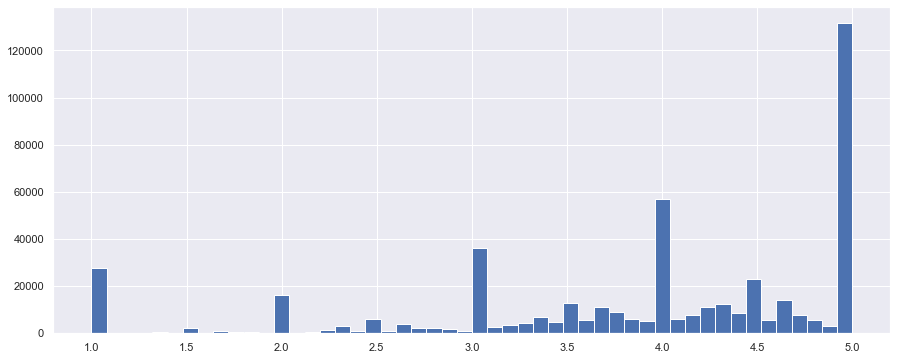

In [9]:
#Plotting Histogram of number of average ratings given to products
plt.figure(figsize=(15,6))
df.groupby('Product ID')['Rating'].mean().hist(bins=50)

In [10]:
df.groupby('Product ID')['Rating'].mean().sort_values(ascending=False).reset_index(name='Mean Rating')

,Product ID,Mean Rating
0,0132793040,5.0
1,B004SGH244,5.0
2,B004SQBRRM,5.0
3,B004SQC6O0,5.0
4,B004SQE6YI,5.0
...,...,...
475997,B0001FC5IE,1.0
475998,B00465T6KK,1.0
475999,B001W1X0LW,1.0
476000,B0069ZWXLE,1.0


## Time Series Visualizations

1. How the number of orders changed throughout time
2. What time of the year is busiest
3. How correlated are the number of orders with holidays
4. How many products are ordered throughout the week. Are there higher numbers during weekends than weekdays?
5. For ease of visualizations take time for only the past decade.
6. Examine peaks in 2013 and 2014

In [11]:

#Set the time stamp as the index
df.reset_index(drop=True,inplace=True)
df.sort_values('Date', ascending=True,inplace=True)
df.set_index('Date',inplace=True)
df.head()

,User ID,Product ID,Rating
Date,,,
1998-12-04,A2ZUNCI13N2OUL,B00000DM9D,4.0
1998-12-07,A28AXJL31RXUON,B00000DM9M,4.0
1998-12-18,AFHLJPG5ZIMNO,B00000DM96,5.0
1998-12-26,AY2NE9ZEZ5LCE,B00000DM9D,5.0
1999-05-02,A2LG0LV5RI86F0,B00000DM93,5.0


### For ease of visualizations lets take orders from 2006 onwards

In [12]:
df_timeseries = df.loc['2006-01-01':]
df_timeseries

,User ID,Product ID,Rating
Date,,,
2006-01-01,A17JQIGHZCK73L,B00004Y2ZF,4.0
2006-01-01,A2P3HVA3WXYMSP,B0002GRQTA,5.0
2006-01-01,A22ZEGWI4XJEQK,B000CCBFF0,3.0
2006-01-01,A131EK7QBO1PBE,B000AYKUUQ,4.0
2006-01-01,A3E5DOAY5VUB1E,B0002YE6EK,5.0
...,...,...,...
2014-07-23,A73N4TGUPZV7V,B00JCE14AU,5.0
2014-07-23,A2BIIQLXDW8MR5,B00IVPU786,5.0
2014-07-23,A1VLZLIRXU73WQ,B00GU9UG9A,1.0


### We can already begin to see that there are gaps in the dates. We do not have data for all days of the months.

## 1. How the number of orders have changed throughout the years

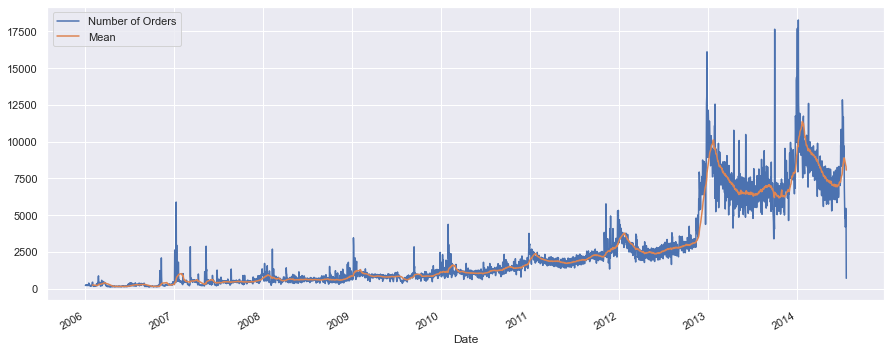

In [13]:
df_timeseries.groupby('Date')['User ID'].count()
plt.figure(figsize=(15,6))
plt.plot(df_timeseries.groupby('Date')['User ID'].count())
df_timeseries.groupby('Date')['User ID'].count().rolling(window=30).mean().plot()
plt.legend(['Number of Orders','Mean'])

### The number of daily orders have remained fairly consistent through the beginning of the 21st century and saw an exponential increase in 2013.

In [14]:
#Creating month and year column
df_timeseries['Month'] = df_timeseries.index.month
df_timeseries['Year'] = df_timeseries.index.year

## 2. How the number of orders look on a yearly level

     Year  Month  User ID  Product ID  Rating
0    2006      1     7496        7496    7496
1    2006      2     7927        7927    7927
2    2006      3    10100       10100   10100
3    2006      4     4398        4398    4398
4    2006      5     4429        4429    4429
..    ...    ...      ...         ...     ...
98   2014      3   262784      262784  262784
99   2014      4   226297      226297  226297
100  2014      5   217031      217031  217031
101  2014      6   220686      220686  220686
102  2014      7   186638      186638  186638

[103 rows x 5 columns]


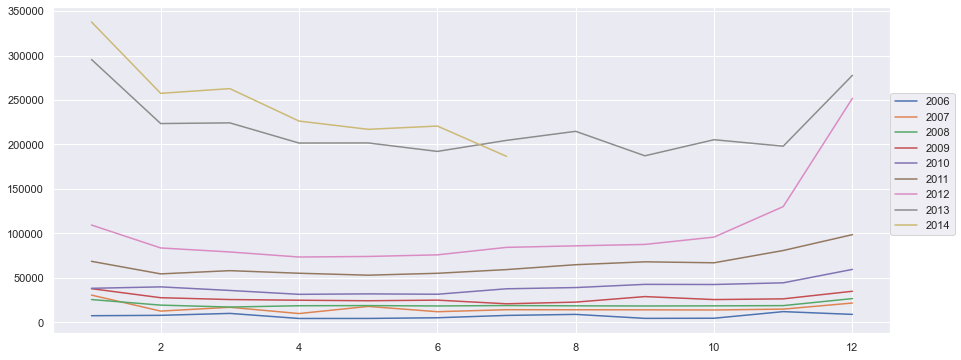

In [15]:
df_timeseries_group_month = df_timeseries.groupby(['Year','Month']).count().reset_index()
print(df_timeseries_group_month)

plt.figure(figsize=(15,6))
for i in df_timeseries_group_month['Year'].unique():
    plt.plot('User ID', data = df_timeseries_group_month[df_timeseries_group_month['Year'] == i].set_index('Month'))

plt.legend(['2006','2007','2008','2009','2010','2011','2012','2013','2014'], loc=(1,0.3))
plt.show()

In [16]:
df_timeseries_group_month[df_timeseries_group_month['Year'] == 2013]

,Year,Month,User ID,Product ID,Rating
84,2013,1,295510,295510,295510
85,2013,2,223517,223517,223517
86,2013,3,224275,224275,224275
87,2013,4,201603,201603,201603
88,2013,5,201717,201717,201717
89,2013,6,192199,192199,192199
90,2013,7,204603,204603,204603
91,2013,8,214780,214780,214780
92,2013,9,187266,187266,187266
93,2013,10,205333,205333,205333


### 3. Do the number of orders have anything to do with holidays of the year?

### 4. How many products are ordered throughout the week. Are there a higher number of orders on the weekends?
### For ease, we will only consider this for the year 2013. The below graph looks at the daily number of orders throughout the year

<AxesSubplot:xlabel='Date'>

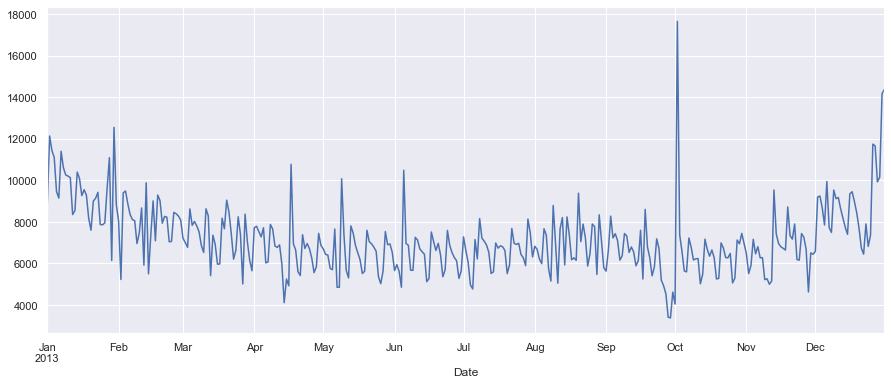

In [17]:
# Grabbing values for only 2013
df_timeseries_2013 = df_timeseries[df_timeseries.index.year == 2013]

plt.figure(figsize=(15,6))
df_timeseries_2013.groupby('Date')['User ID'].count().plot()

### Now lets break this down to a weekly level and see how it looks for each month

    Month  Day of Week Day of Week Name  User ID  Product ID  Rating   Year
0       1            0              Mon    41885       41885   41885  41885
1       1            1              Tue    44888       44888   44888  44888
2       1            2              Wed    53635       53635   53635  53635
3       1            3            Thurs    47890       47890   47890  47890
4       1            4              Fri    38373       38373   38373  38373
..    ...          ...              ...      ...         ...     ...    ...
79     12            2              Wed    34188       34188   34188  34188
80     12            3            Thurs    36664       36664   36664  36664
81     12            4              Fri    37478       37478   37478  37478
82     12            5              Sat    32143       32143   32143  32143
83     12            6              Sun    38075       38075   38075  38075

[84 rows x 7 columns]


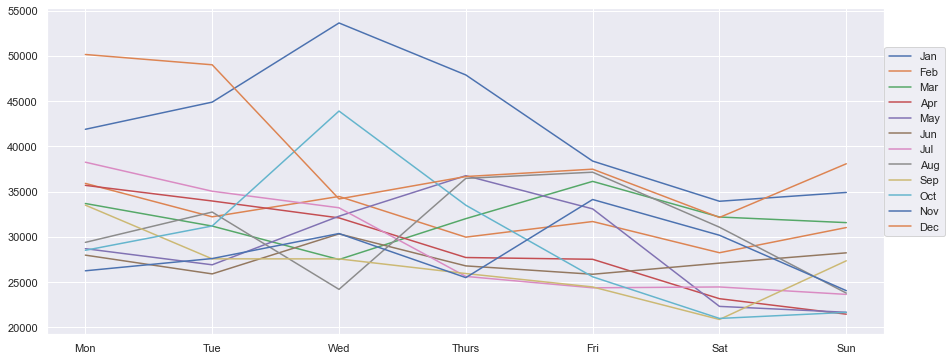

In [18]:
# Getting day of week
df_timeseries_2013['Day of Week'] = df_timeseries_2013.index.weekday
df_timeseries_2013['Day of Week Name'] = df_timeseries_2013['Day of Week']

# Converting day of week numbers to names
df_timeseries_2013['Day of Week Name'] = df_timeseries_2013['Day of Week Name'].replace([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])

# Grouping to get the number of orders in a week per month of 2013
df_timeseries_2013_grouped = df_timeseries_2013.groupby(['Month','Day of Week','Day of Week Name']).count().reset_index()
df_timeseries_2013_grouped = df_timeseries_2013_grouped.sort_index(level='Day of Week')
print(df_timeseries_2013_grouped)

#Plotting number of orders in a week for 2013
plt.figure(figsize=(15,6))
for i in df_timeseries_2013_grouped['Month'].unique():
    plt.plot('User ID', data = df_timeseries_2013_grouped[df_timeseries_2013_grouped['Month'] == i].set_index('Day of Week Name'))

plt.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], loc=(1,0.3))

### January far exceeds all other months in terms of number of orders made

In [19]:
df_2013_grouped = pd.DataFrame(df_timeseries_2013.groupby('Date')['User ID'].count())
df_2013_grouped[df_2013_grouped['User ID'] == df_2013_grouped['User ID'].max()]

,User ID
Date,
2013-10-02,17649


In [20]:
df_2013_grouped.loc['2013-09-28':'2013-10-5']

,User ID
Date,
2013-09-28,3413
2013-09-29,3383
2013-09-30,4623
2013-10-01,4046
2013-10-02,17649
2013-10-03,7383
2013-10-04,6584
2013-10-05,5641
